# Introduction to Statistics Part 2 (Tests and More)

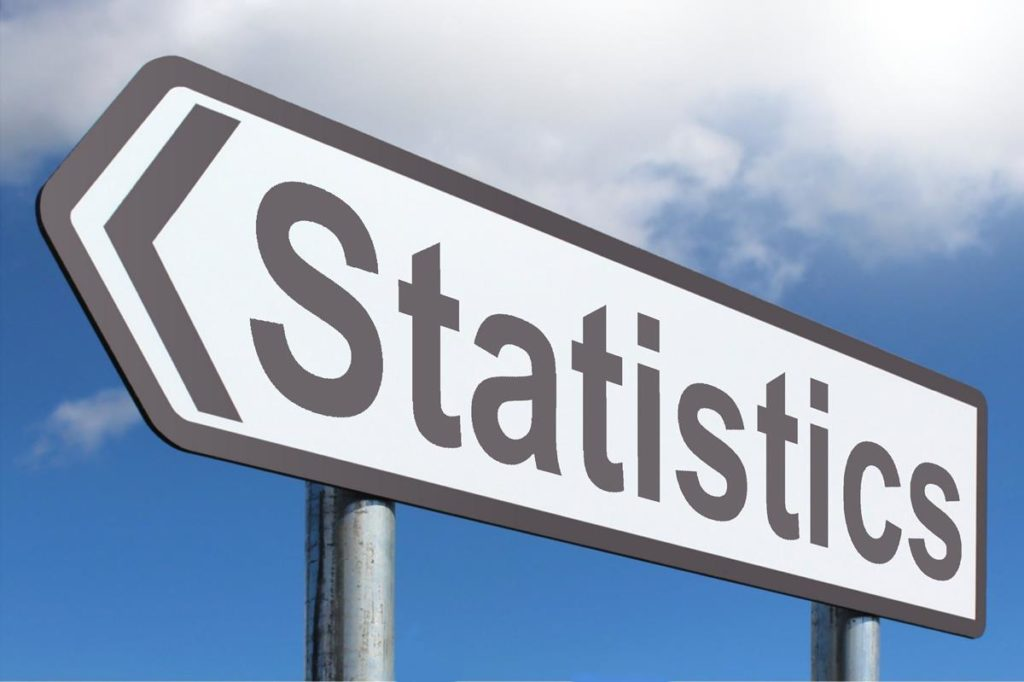

# To read Introduction to Statistics Part 1:

[Introduction to Statistics Part 1](https://www.kaggle.com/muratmert/introduction-to-statistics-with-dataset-part-i)

<font color = '#cdcd00'>
Content: 
    
1. [Concepts of Probability](#1)

1. [Discrete probability distributions](#2)
    *            [Bernoulli](#3)
    *            [Binom](#4)
    *            [Poisson](#5)
1. [Continuous probability distribution](#6) 

1. [Hypothesis testing](#7)
    *            [4.1 One Sample t Test](#8)
    *            [4.2 Non-parametric One Sample t Test](#9)
    *            [4.3 One Proportion Z Test](#10)
    *            [4.4 Two-Sample t-Test (Independent)](#11)
    *            [4.5 Non-Parametric Two-Sample t-Test](#12)
    *            [4.6 Dependent t-test](#13)
    *            [4.7 Wilcoxon signed-rank test](#14)
    *            [4.8 Two Proportion Z-Test](#15)
    *            [4.9 Variance Analysis](#16)
    *            [4.10 Non-Parametric hypothesis test (Variance Analysis)](#17)
    *            [4.11 Correlation Analysis](#18)

<a id = "1"></a><br>
# 1. Concepts of Probability
**Probability** is the numerical expression of likelihood.

The variable that takes its values from the results of the experiment is called a **random variable.**

The structure created by the numerical equivalents of events and situations is called **distribution.**

**Probability Distribution:** It is the presentation of the numerical equivalent of the events with the probability of occurrence.

**Probability Function:** The function used to calculate the probability of occurrence

<a id = "2"></a><br>
# 2. Discrete probability distributions:
* Bernoulli
* Binom
* Poisson

<a id = "3"></a><br>
### 2.1 Bernoulli: 
* It is used for two results in successful-unsuccessful, positive-negative events. (Nominal)

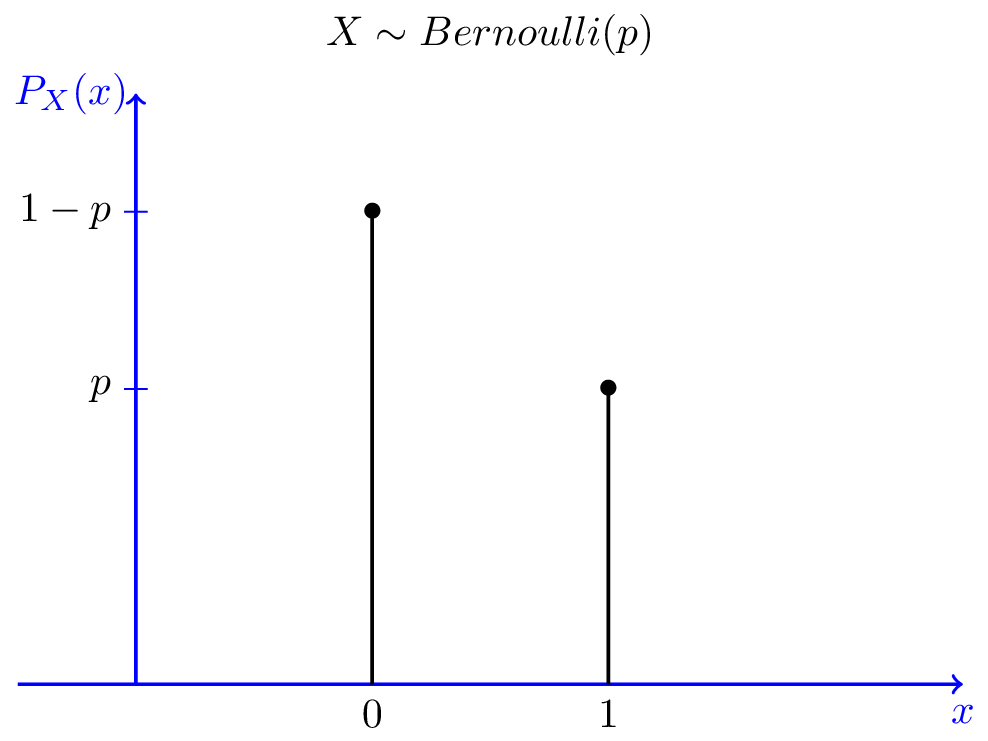

In [ ]:
#Coin flipping

from scipy.stats import bernoulli
p=0.5 # possibility (between 0-1)
rv= bernoulli(p)
print(rv.pmf(k=0)) #0=heads, 1=tails
print(rv.pmf(k=1))

### Bonus: Law of large numbers 
* It is the probability theorem that describes the long-term stability of a random variable.

In [ ]:
import pandas as pd
import numpy as np
rng=np.random.RandomState(123) 
for i in range(1,20):
    number_of_test= 2**i
    head_or_tail=rng.randint(0,2,size=number_of_test) #choose 1 or 0. 1=heads,0=tails
    posibility_of_heads=np.mean(head_or_tail) #Since zero has no effect on the mean, we calculate the mean.
    print("Number of Test,", number_of_test, "----", "Posibility of Heads: {0}".format(posibility_of_heads))

* As you can see, as the number of tests increases, the probability approaches 0.5.

<a id = "4"></a><br>
## 2.2 Binom:
* The independent n trial result k is used to calculate the probability of success.

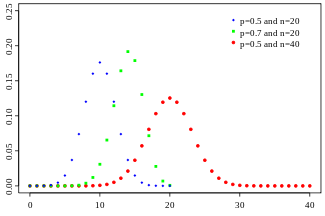

* Suppose we hit a target with a probability of 0.5. This graph shows the probability of success after 20 attempts. Let's look at the code

In [ ]:
from scipy.stats import binom
p=0.5 #probability
n=20 #number of attempts
rv=binom(n,p)
print('{:.10f}'.format(rv.pmf(0))) #possibility of never hitting
print(rv.pmf(10)) #Possibility of hitting 10 times
print('{:.10f}'.format(rv.pmf(20))) #Possibility of hitting 20 times


In [ ]:
#advertisements are placed on a site. The probability of a person watching the ad is 0.01.
#What is the probability that 100 people get 1, 5 and 10 clicks on the ad?
from scipy.stats import binom
p=0.01
n=100
rv=binom(n,p)
print('{:.5f}'.format(rv.pmf(1)))
print(rv.pmf(5))
print('{:.10f}'.format(rv.pmf(10)))

<a id = "5"></a><br>
## 2.3 Poisson:
* It is used to calculate the probability of events that are seldom encountered in a given area in a given time period. The number of observations is very high and the probability of the expected result to come is very low unlikely. For example, the number of fraudulent transactions in credit card transactions.

In [ ]:
#poisson
#It is trying to calculate incorrect ad entry.
#As a result of the measurements, the lambda (average number of errors) is measured as 0.1.
#Calculate no errors,3 and 5 error cases

from scipy.stats import poisson
lambda_=0.1
rv= poisson(mu=lambda_)
print(rv.pmf(k=0))
print(rv.pmf(k=1))
print('{:.10f}'.format(rv.pmf(k=3)))
print('{:.10f}'.format(rv.pmf(k=5)))

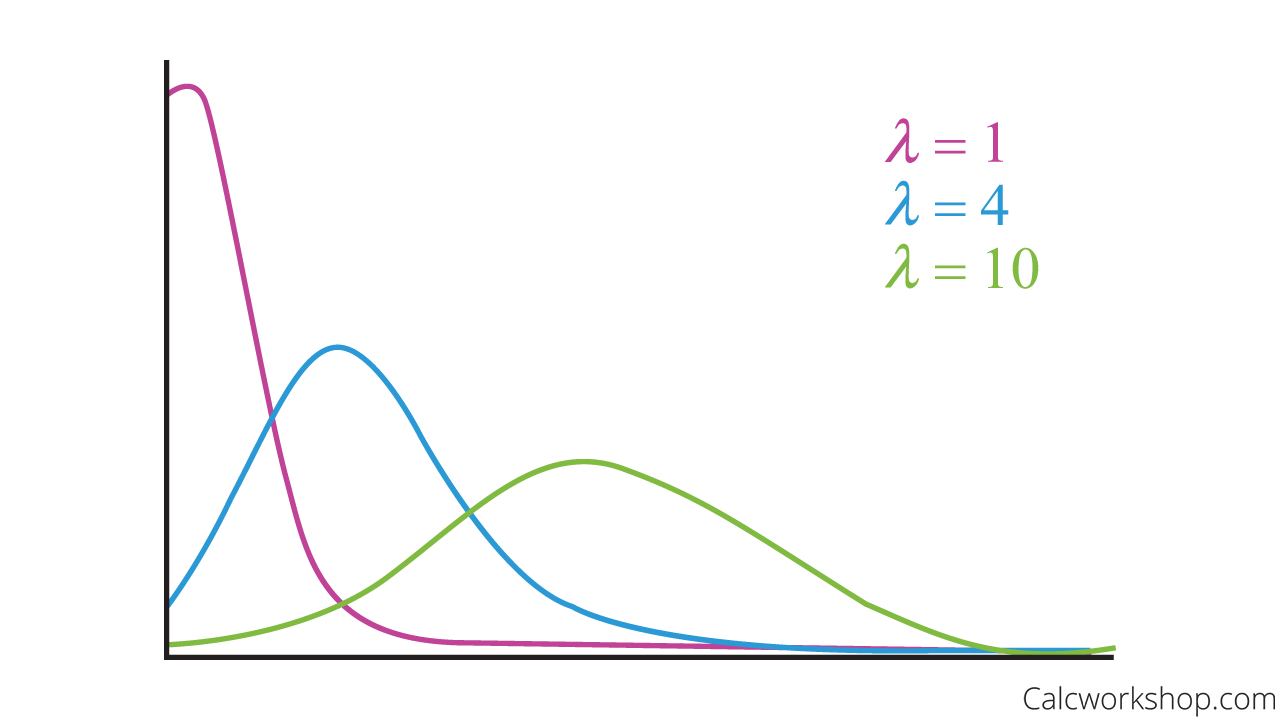

* As the number of rare events occurs, the probability of it decreases.

<a id = "6"></a><br>
# 3. Continuous probability distribution
* Normal Distribution
* Uniform
* Exponential

### Normal Distribution:
* Used to calculate probability random variables known to be normally distributed.

<a id = "7"></a><br>
# 4. Hypothesis testing
* A statistical technique used to test a belief and a argument.

### Hypothesis Testing Steps:
1. Establishing hypotheses and determining their direction (H0 and H1)
2. Determination of significance level and table value (significance=Alpha)
3. Determination and calculation of Test statistics
4. Comparison of the calculated test statistic with the value corresponding to the alpha
5. If the Test statistic > table value is H0, it is rejected.

* If the standard deviation of the population is known, the Z statistic is used.
* If the standard deviation of the population is unknown and n>30, the Z statistic is used.
* If the standard deviation of the population is unknown and n<30, the test statistic is used.

<a id = "8"></a><br>
# 4.1 One Sample t Test
* The One Sample t Test determines whether the sample mean is statistically different from a known or hypothesized population mean. The One Sample t Test is a parametric test.

*  Example: People spend an average of 215 seconds in the X store. Is it really 215 seconds ?
*  H0: µ=215 second
*  H1: µ≠215 second

**Assumption:** The distribution must be a normal distribution. Lets test it
* H0: there is no difference between the sample distribution and the theoretical normal distribution
* H1: There is a difference (the distribution is not normal)

In [ ]:
import pandas as pd
import numpy as np
import statistics
times=[]
rng=np.random.RandomState(4)
#we create 50 random time
for i in range(50):
    
    example_times=rng.randint(50,350) #between 50 and 350
    times.append(example_times)
print(times[0:50])
#we are testing distribution
from scipy.stats import shapiro

test_statistic,p_value=shapiro(times)

print('Test statistic = %.4f, p-value = %.4f' % (test_statistic,p_value))


* **p-value > 0.05** (significance level) indicates that this H0 hypothesis is irrefutable. So our distribution is normal distribution. Now that the hypothetical assumption is fulfilled, we can do the test.

In [ ]:
import scipy.stats as stats
print("Mean= {0}".format(statistics.mean(times)))
test_statistic,p_value=stats.ttest_1samp(times,popmean=215)
print('Test statistic = %.4f, p-value = %.4f' % (test_statistic,p_value))

* **p-value < 0.05** (significance level) indicates that this H0 hypothesis is reject. So the average time spent in the store is not 215, and even less than 215

<a id = "9"></a><br>
# 4.2 Non-parametric One Sample t Test
* it is used when assumption in the one sample t test is not provided.

In [ ]:
times2=[]
rng=np.random.RandomState(20)
for i in range(50):
    
    example_times2=rng.randint(50,350)
    times2.append(example_times2)
print(times2[0:100])

#H0: there is no difference between the sample distribution and the theoretical normal distribution
#H1: There is a difference (the distribution is not normal)
from scipy.stats import shapiro
shapiro(times2)

* **p-value < 0.05** (significance level) indicates that this H0 hypothesis is reject. So its not normal distribution. Now we can test it.

In [ ]:
from statsmodels.stats.descriptivestats import sign_test
test_statistic,p_value=sign_test(times2,215)
print('Test statistic = %.4f, p-value = %.4f' % (test_statistic,p_value))

* **p-value > 0.05** (significance level) indicates that this H0 hypothesis is irrefutable. H0: µ=215 second

<a id = "10"></a><br>
# 4.3 One Proportion Z Test
* A proportional expression is used when it is required to be tested.

* You handed out a banner with a discount code for online shopping. It's calculated that you got a conversion rate of 0.18 from this banner.
* Details:
  500 people took the banner, but 70 people shopped. Here's the ratio 70/500 0.14

H0: p= 0.18 

H1: p≠ 0.18

In [ ]:
from statsmodels.stats.proportion import proportions_ztest
count=70 # number of success
nobs=500 # number of observations
value=0.18 #value we want to test
test_statistic,p_value=proportions_ztest(count,nobs, value)
print('Test statistic = %.4f, p-value = %.4f' % (test_statistic,p_value))

**p-value < 0.05** (significance level) indicates that this H0 hypothesis is reject. So p≠ 0.18

<a id = "11"></a><br>
# 4.4 Two-Sample t-Test (Independent)
* Used when comparing two group means.

Assumptions
* The distribution must be a normal distribution
* Variances must be homogeneous


* You're doing a machine learning project that makes a product recommendation for a site and you're adding it to your site. It is desirable to compare the revenues of this project with the revenues of the old system. 
* We divide it into two groups. We show the old system to the first group, the new system to the second group and compare the revenues.

H0: μ1=μ2

H1: μ1≠μ2

In [ ]:
rng=np.random.RandomState(15)
income_a=[]
rng=np.random.RandomState(1233)
for i in range(40):
    
    randoms=rng.randint(15,35)
    income_a.append(randoms)

income_b=[]

rng=np.random.RandomState(5)
for i in range(40):
    
    randoms=rng.randint(15,35)
    income_b.append(randoms)
    
print("İncome A:{0}".format(income_a[0:25]))
print("İncome B:{0}".format(income_b[0:25]))

* we put the data in a specific format to perform the test

In [ ]:
A=pd.DataFrame(income_a)
B=pd.DataFrame(income_b)
A_B=pd.concat([A,B], axis=1)    
A_B.columns=["A","B"]
print(A_B.head())

GROUP_A=np.arange(len(A))
GROUP_A=pd.DataFrame(GROUP_A)
GROUP_A[:]="A"
A=pd.concat([A,GROUP_A],axis=1)

GROUP_B=np.arange(len(B))
GROUP_B=pd.DataFrame(GROUP_B)
GROUP_B[:]="B"
B=pd.concat([B,GROUP_B],axis=1)

AB=pd.concat([A,B])
AB.columns=["Income","GROUP"]
print("Finally..")
print(AB.head())
print(AB.tail())

In [ ]:
import seaborn as sns
sns.boxplot(x="GROUP",y="Income", data=AB);

* The mean of the second group seems to be higher. But we need to test whether it was random.

In [ ]:
#Assumptions 1:  Is normal distribution ?

print(shapiro(A_B.A))
print(shapiro(A_B.B))

* The **H0 hypothesis** in both groups is irrefutable. So **distribution is normal**.

In [ ]:
#Assumptions 2:  is variances homogeneous ?

print(stats.levene(A_B.A, A_B.B))

The **H0 hypothesis** in both groups is irrefutable. So variances is **homogeneous**. Now we can test.

In [ ]:
test_statiscis,p_Value= stats.ttest_ind(A_B["A"],A_B["B"],equal_var=True)
print('Test Statistic = %.4f, P_Value= %.4f' % (test_statiscis,p_Value))

* The **H0 hypothesis** is irrefutable. So when we compare the two models, there is no significant difference in income mean statistically.

<a id = "12"></a><br>
# 4.5 Non-Parametric Two-Sample t-Test
* Used when assumptions are not provided.

In [ ]:
rng=np.random.RandomState(15)
income_a=[]
rng=np.random.RandomState(133)
for i in range(40):
    
    randoms=rng.randint(15,35)
    income_a.append(randoms)

income_b=[]

rng=np.random.RandomState(27)
for i in range(40):
    
    randoms=rng.randint(15,35)
    income_b.append(randoms)
    
print("İncome A:{0}".format(income_a[0:25]))
print("İncome B:{0}".format(income_b[0:25]))

In [ ]:
A=pd.DataFrame(income_a)
B=pd.DataFrame(income_b)
A_B=pd.concat([A,B], axis=1)    
A_B.columns=["A","B"]
print(A_B.head())

GROUP_A=np.arange(len(A))
GROUP_A=pd.DataFrame(GROUP_A)
GROUP_A[:]="A"
A=pd.concat([A,GROUP_A],axis=1)

GROUP_B=np.arange(len(B))
GROUP_B=pd.DataFrame(GROUP_B)
GROUP_B[:]="B"
B=pd.concat([B,GROUP_B],axis=1)

AB=pd.concat([A,B])
AB.columns=["Income","GROUP"]
print("Finally..")
print(AB.head())
print(AB.tail())

In [ ]:
sns.boxplot(x="GROUP",y="Income", data=AB);

In [ ]:
#Assumptions 1:  is normal distribution ?
from scipy.stats import shapiro
print(shapiro(A_B.A))
print(shapiro(A_B.B))

**HO hypothesis** is reject. The distribution is **not normal**.

In [ ]:
#Assumptions 2:  is variances homogeneous ?
print(stats.levene(A_B.A, A_B.B))

**HO hypothesis** is reject. The variances is **not homogeneous**. Now we can test.

In [ ]:
print(stats.mannwhitneyu(A_B.A , A_B.B))

The **H0 hypothesis** is irrefutable. So when we compare the two models, there is no significant difference in income mean statistically.

<a id = "13"></a><br>
# 4.6 Dependent t-test
* The dependent t-test (also called the paired t-test or paired-samples t-test) compares the means of two related groups to determine whether there is a statistically significant difference between these means.

* A manager is considering training a group of workers on the sector.The manager wants to test whether the training is beneficial. For this, he applies pre-and post-training tests to the same audience.

* H0: µ1 = µ2 (before=after)
* H1: µ1 ≠ µ2 (before ≠ after)

In [ ]:
rng=np.random.RandomState(15)
before=[]
rng=np.random.RandomState(65)
for i in range(50):
    
    randoms=rng.randint(116,130)
    before.append(randoms)

after=[]

rng=np.random.RandomState(8)
for i in range(50):
    
    randoms=rng.randint(118,140)
    after.append(randoms)
print("BEFORE :{0}".format(before[0:25]))
print("AFTER :{0}".format(after[0:25]))

In [ ]:
A=pd.DataFrame(before)
B=pd.DataFrame(after)
A_B=pd.concat([A,B], axis=1)    
A_B.columns=["Before","After"]


GROUP_A=np.arange(len(A))
GROUP_A=pd.DataFrame(GROUP_A)
GROUP_A[:]="before"
A=pd.concat([A,GROUP_A],axis=1)

GROUP_B=np.arange(len(B))
GROUP_B=pd.DataFrame(GROUP_B)
GROUP_B[:]="After"
B=pd.concat([B,GROUP_B],axis=1)

AB=pd.concat([A,B])
AB.columns=["performance_value","situation"]
print(AB.head())
print(AB.tail(70))

In [ ]:
#Assumptions 1:  is normal distribution ?
print(shapiro(A_B["Before"]))
print(shapiro(A_B["After"]))

The **H0 hypothesis** in both groups is irrefutable. So distribution is **normal**.

In [ ]:
#is variances homogeneous ?
print(stats.levene(A_B["Before"], A_B["After"]))

**HO hypothesis** is reject. The variances is not homogeneous. **But a little can be ignored.** 

In [ ]:
sns.boxplot(x="situation",y="performance_value", data=AB);

* After training, the mean performance increased. Let's test if this is random.

In [ ]:
test_statiscis,p_Value= stats.ttest_rel(A_B["Before"],A_B["After"])
print('Test Statistic = %.4f, P_Value= %.4f' % (test_statiscis,p_Value))

* HO hypothesis is reject. 
* There is a statistically significant difference with an error rate of 5 percent and an accuracy rate of 95 percent.
* There is an increase in performance after training

<a id = "14"></a><br>
# 4.7 Wilcoxon signed-rank test
* Used when assumptions of Dependent t-test are not provided.

In [ ]:
rng=np.random.RandomState(10)
before=[]
rng=np.random.RandomState(65)
for i in range(50):
    
    randoms=rng.randint(116,130)
    before.append(randoms)

after=[]

rng=np.random.RandomState(9)
for i in range(50):
    
    randoms=rng.randint(118,140)
    after.append(randoms)
print("BEFORE :{0}".format(before[0:25]))
print("AFTER :{0}".format(after[0:25]))

In [ ]:
A=pd.DataFrame(before)
B=pd.DataFrame(after)
A_B=pd.concat([A,B], axis=1)    
A_B.columns=["Before","After"]


GROUP_A=np.arange(len(A))
GROUP_A=pd.DataFrame(GROUP_A)
GROUP_A[:]="before"
A=pd.concat([A,GROUP_A],axis=1)

GROUP_B=np.arange(len(B))
GROUP_B=pd.DataFrame(GROUP_B)
GROUP_B[:]="After"
B=pd.concat([B,GROUP_B],axis=1)

AB=pd.concat([A,B])
AB.columns=["performance_value","situation"]
print(AB.head())
print(AB.tail())

In [ ]:
#Assumptions 1:  is normal distribution ?
print(shapiro(A_B["Before"]))
print(shapiro(A_B["After"]))

* The H0 hypothesis is reject.

In [ ]:
#is variances homogeneous ?
print(stats.levene(A_B["Before"], A_B["After"]))

* The H0 hypothesis is reject. Variances is not homogeneous.
* Both assumptions are not provided. Now we can test.

In [ ]:
test_statiscis,p_Value= stats.ttest_rel(A_B["Before"],A_B["After"])
print('Test Statistic = %.4f, P_Value= %.4f' % (test_statiscis,p_Value))

* H0 hypothesis is reject. There is a statistically significant difference with an error rate of 5 percent and an accuracy rate of 95 percent. there is an increase in performance after training

<a id = "15"></a><br>
# 4.8 Two Proportion Z-Test
* This test for a difference in proportions. A two proportion z-test allows you to compare two proportions to see if they are the same.

We want to make a button change on the website.
the red button has 300 clicks on 1000 views, and the Green has 250 clicks on 1100 views.
* H0: There is no difference between buttons.
* H1: There is difference.

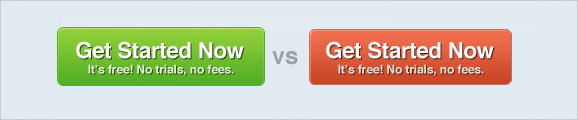

In [ ]:
import numpy as np
from statsmodels.stats.proportion import proportions_ztest
number_of_clicks=np.array([300,250])
number_of_observations=np.array([1000,1100])
print(proportions_ztest(count=number_of_clicks, nobs=number_of_observations))

* H0 hypothesis is reject. There is a statistically significant difference with an error rate of 5 percent and an accuracy rate of 95 percent.

<a id = "16"></a><br>
# 4.9 Variance Analysis
* To learn whether there is a statistically significant difference about the mean of two or more groups
used when requested

You're the editor of a news website. you want users to spend more time on the site.
for this reason, we define 3 different methods as news headlines for the user to stay on the site longer
* Normal 
* One-sided news
* Engaging (engaging pictures and titles)

**H0: µ1=µ2=µ3** The durations in 3 different types of news are the same.

**H1: µ1≠µ2≠µ3** not the same

In [ ]:
import pandas as pd
#normal
A=pd.DataFrame([28,33,30,29,28,29,27,31,30,32,28,33,25,29,27,31,31,30,31,34,30,32,31])
#one-side news
B=pd.DataFrame([29,31,23,41,35,34,32,23,31,33,34,36,35,37,36,34,27,32,34,35,34,31,30])
#engaging
C=pd.DataFrame([35,37,39,41,39,42,38,34,35,43,41,33,35,37,36,32,38,45,43,41,40,41,39])
dfs=[A,B,C]
ABC=pd.concat(dfs,axis=1)
ABC.columns=["GROUP_A","GROUP_B","GROUP_C"]
print(ABC.head())

### Assumptions
* Groups have to be independent of each other. (we divided users into 3 different groups , each group saw a different news headline.)
* Normal Distribution
* Homogeneity of variances

In [ ]:
#Assumptions 2:  is normal distribution ?

from scipy.stats import shapiro
print(shapiro(ABC["GROUP_A"]))
print(shapiro(ABC["GROUP_B"]))
print(shapiro(ABC["GROUP_C"]))

* The **H0 hypothesis** in both groups is irrefutable. So distribution is **normal**.

In [ ]:
#Assumptions 2:  is variances homogeneuos ?

print(stats.levene(ABC["GROUP_A"],ABC["GROUP_B"],ABC["GROUP_C"]))

The **H0 hypothesis** in both groups is irrefutable. So variances is **homogeneous**. Now we can test.

In [ ]:
from scipy.stats import f_oneway

print('{:.15f}'.format(f_oneway(ABC["GROUP_A"],ABC["GROUP_B"],ABC["GROUP_C"])[1]))

In [ ]:
sns.boxplot(data=ABC);

**HO hypothesis** is reject. There is a statistically significant difference between the groups. And the **engaging news type has been displayed for longer.**

<a id = "17"></a><br>
# 4.10 Non-Parametric hypothesis test (Variance Analysis)
Assumptions for the Variance Analysis:
* Groups have to be independent of each other. (we divided users into 3 different groups , each group saw a different news headline.)
* Normal Distribution
* Homogeneity of variances

### If these assumptions are not provided, this test is used.

In [ ]:
A=pd.DataFrame([28,31,30,29,29,29,29,31,30,31,28,33,29,29,28,31,31,30,31,32,30,32,31])
B=pd.DataFrame([29,31,23,41,35,34,32,23,31,33,34,36,35,37,36,34,27,32,34,35,34,31,30])
C=pd.DataFrame([35,37,39,41,39,42,38,34,35,43,41,33,35,37,36,32,38,45,43,41,40,41,39])
dfs=[A,B,C]
ABC=pd.concat(dfs,axis=1)
ABC.columns=["GROUP_A","GROUP_B","GROUP_C"]
from scipy.stats import shapiro
print(shapiro(ABC["GROUP_A"]))
print(shapiro(ABC["GROUP_B"]))
print(shapiro(ABC["GROUP_C"]))
print(stats.levene(ABC["GROUP_A"],ABC["GROUP_B"],ABC["GROUP_C"]))

* The assumption of homogeneity of variances is not provided.

In [ ]:
from scipy.stats import kruskal

print('{:.10f}'.format(kruskal(ABC["GROUP_A"],ABC["GROUP_B"],ABC["GROUP_C"])[1]))

In [ ]:
import seaborn as sns
sns.boxplot(data=ABC);

**HO hypothesis is reject.** There is a statistically significant difference between the groups. And the **engaging news type has been displayed for longer**.

<a id = "18"></a><br>
# 4.11 Correlation Analysis
* In statistics, correlation or dependence is any statistical relationship, whether causal or not, between two random variables or bivariate data. 

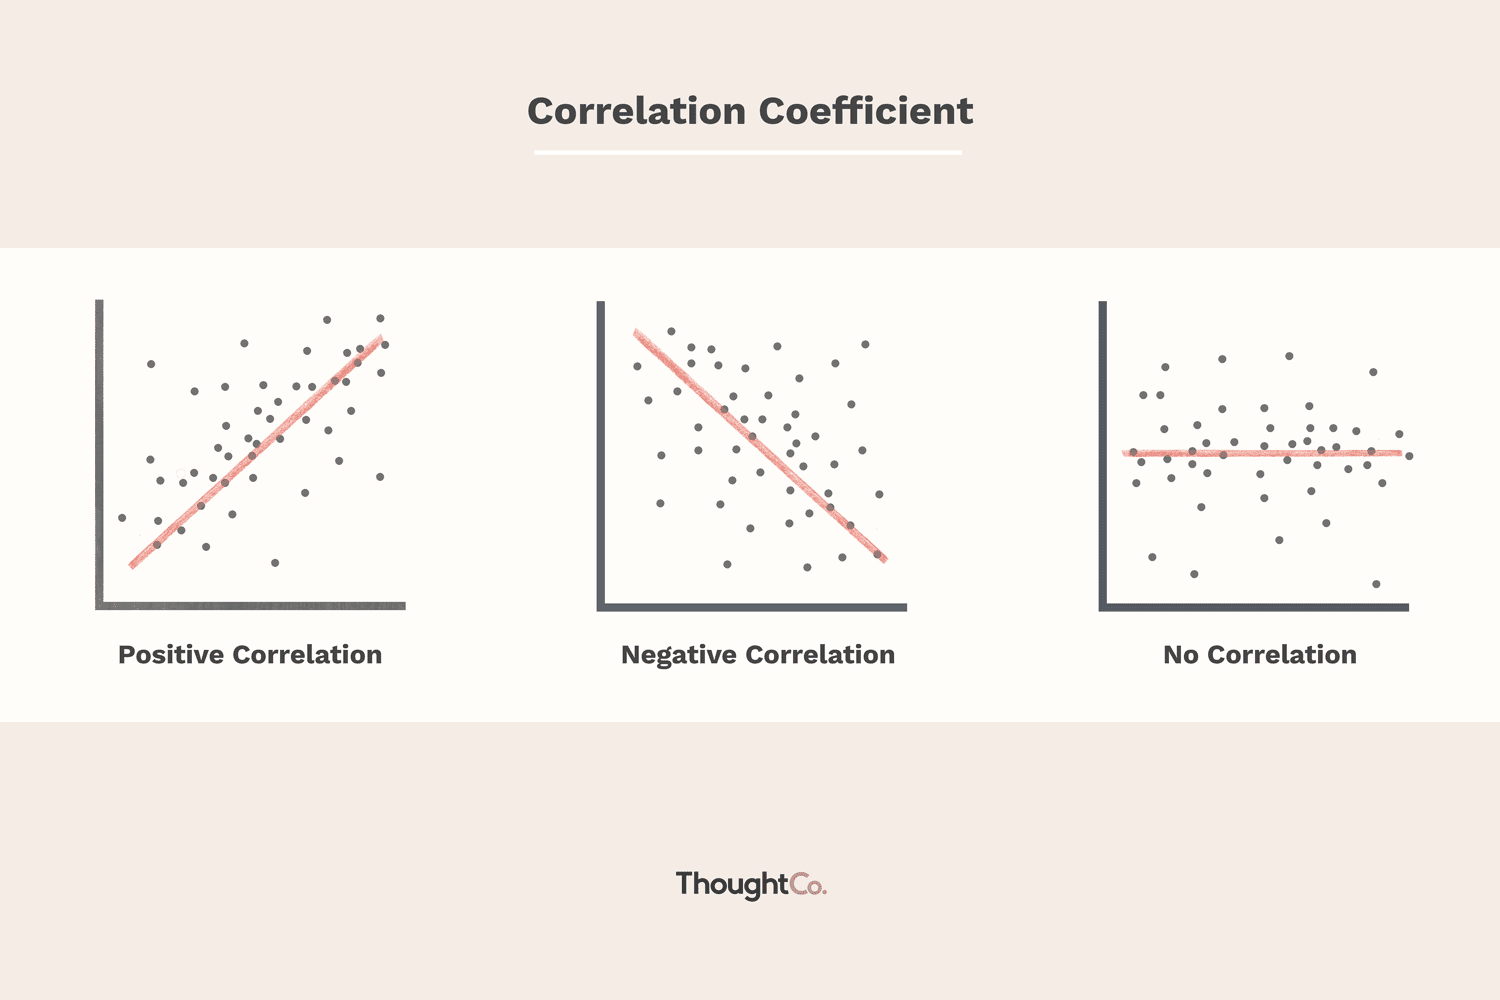

**Assumption:** in two variables, there is an assumption of normality.
* The pearson correlation coefficient is used if the assumption is provided.
* Spearman is used if it is not provided.

* **H0: p=0** *There is no correlation.*
* **H1: p≠0** *There is correlation.*

In [ ]:
#load heart disease dataset
data=pd.read_csv('../input/heart-disease-uci/heart.csv')
data.head()

In [ ]:
data.plot.scatter("age","thalach");

* We can see that there is a negative correlation.

In [ ]:
#Assumption:  Is normal distribution ?
from scipy.stats import shapiro
print(shapiro(data.age))
print(shapiro(data.thalach))

* **H0 hypothesis** is reject. There is a statistically significant difference between the groups. That's why we should use **spearman instead of pearson**.

In [ ]:
print(data.age.corr(data.thalach,method="spearman"))

* We can say, there is **low negative correalation** between age and thalach variables.

In [ ]:
test_statistic,p_value=stats.spearmanr(data.age,data.thalach)
print('Test statistic = %.4f, p-value = %.15f' % (test_statistic,p_value))

* **HO hypothesis** is reject there is a statistically significant correlation between these two variables.

# Thanks.

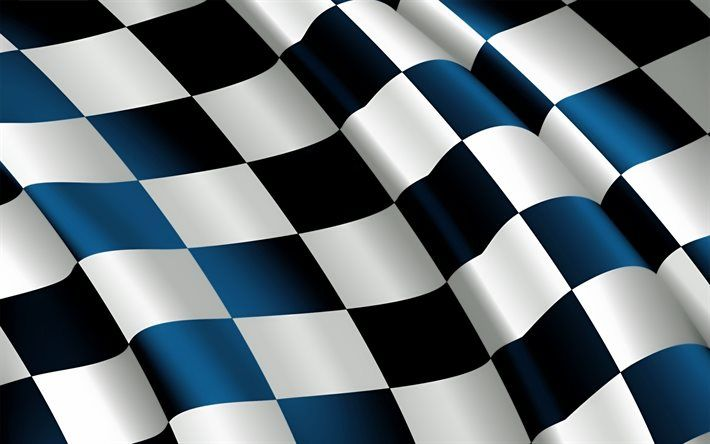